In [44]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


In [45]:
img_width = 150
img_height = 150

train_data_dir = '/content/drive/My Drive/dogs/dog cat/data/train'
validation_data_dir = '/content/drive/My Drive/dogs/dog cat/data/validation'
train_samples = 2000
validation_samples = 800
epochs = 20
batch_size = 16
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [46]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [47]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [49]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [50]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [51]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [52]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


16
1.0


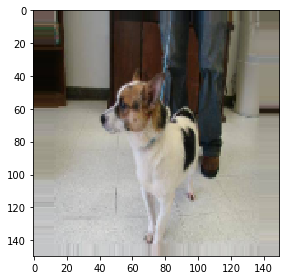

0.0


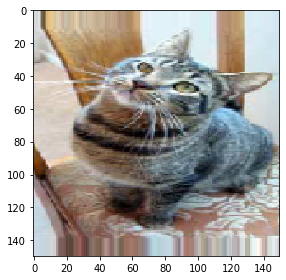

1.0


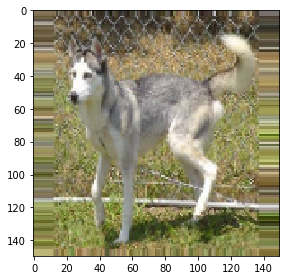

0.0


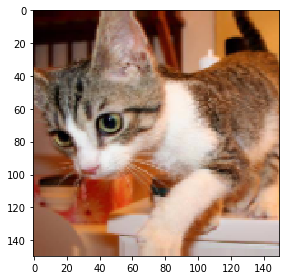

0.0


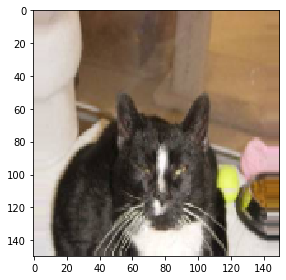

0.0


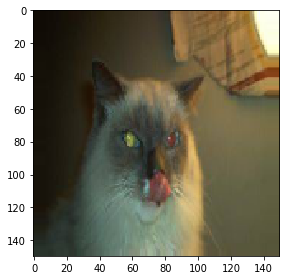

0.0


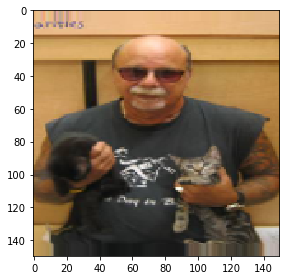

0.0


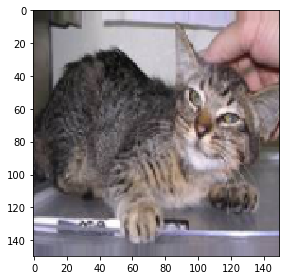

1.0


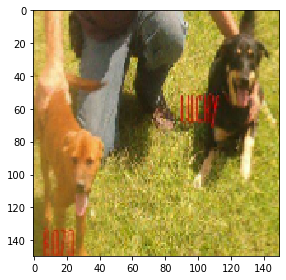

1.0


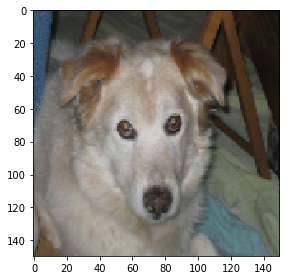

0.0


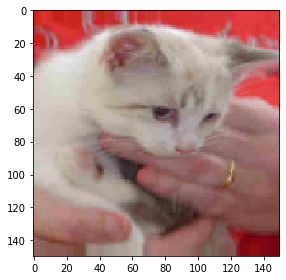

1.0


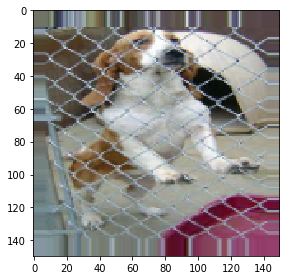

0.0


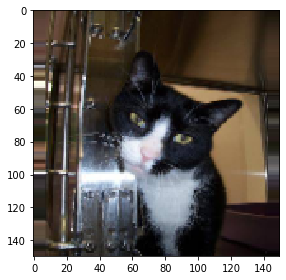

0.0


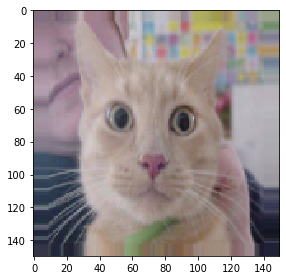

1.0


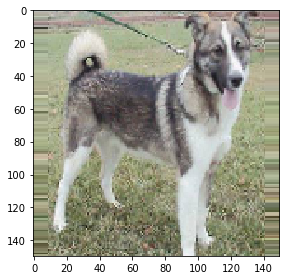

1.0


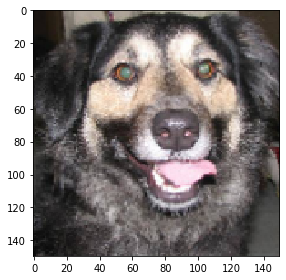

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [54]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 802 images belonging to 2 classes.


In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples//batch_size ,#generally steps are train_samples// batch size
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples//batch_size)#generally steps are train_samples// batch size

Epoch 1/20
125/125 [==============================] - 73s 583ms/step - loss: 0.6982 - accuracy: 0.5080 - val_loss: 0.6886 - val_accuracy: 0.5013
Epoch 2/20
125/125 [==============================] - 72s 580ms/step - loss: 0.6907 - accuracy: 0.5245 - val_loss: 0.6832 - val_accuracy: 0.5950
Epoch 3/20
125/125 [==============================] - 72s 579ms/step - loss: 0.6795 - accuracy: 0.5720 - val_loss: 0.6689 - val_accuracy: 0.6175
Epoch 4/20
125/125 [==============================] - 73s 580ms/step - loss: 0.6638 - accuracy: 0.6215 - val_loss: 0.6521 - val_accuracy: 0.6363
Epoch 5/20
125/125 [==============================] - 72s 580ms/step - loss: 0.6450 - accuracy: 0.6375 - val_loss: 0.6361 - val_accuracy: 0.6425
Epoch 6/20
125/125 [==============================] - 72s 580ms/step - loss: 0.6294 - accuracy: 0.6595 - val_loss: 0.6212 - val_accuracy: 0.6700
Epoch 7/20
125/125 [==============================] - 73s 583ms/step - loss: 0.6125 - accuracy: 0.6770 - val_loss: 0.6215 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


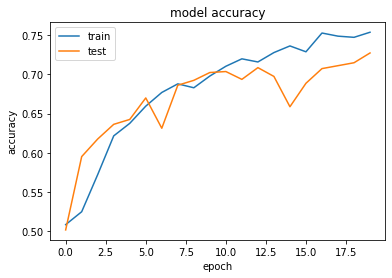

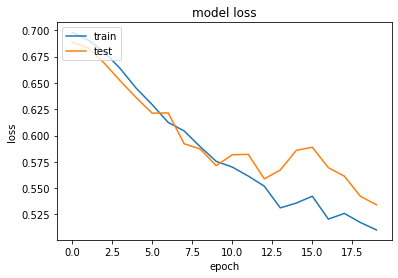

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
predict_dir_path='/content/drive/My Drive/dogs/dog cat/image_data/test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['3111.jpg', '2512.jpg', '2994.jpg', '2658.jpg', '236.jpg', '310.jpg', '234.jpg', '3285.jpg']


In [58]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

3111.jpg: cat
2512.jpg: dog
2994.jpg: dog
2658.jpg: cat
236.jpg: cat
310.jpg: dog
234.jpg: cat
3285.jpg: dog
Total Dogs : 4
Total Cats : 4


In [59]:
model.save("model.h5")